In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [6]:
data=loadmat("/content/drive/MyDrive/Colab Notebooks/ex7data1.mat")
X=data["X"]
print(X.shape)

(50, 2)


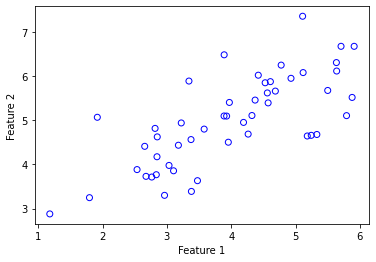

In [10]:
plt.scatter(X[:,0],X[:,1],facecolor="none",edgecolor="Blue",marker="o")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [13]:
# this function make our feature mean 0 and std 1
def feature_standardize(X):
  my_mean=np.mean(X,axis=0)
  my_std=np.std(X,axis=0)
  X_updated=(X-my_mean)/my_std
  return X_updated
# this make covariance matriX and return eign vector
def calc_pca(X):
  m=X.shape[0]
  cov_matrix=(1/m)*(X.T @ X)
  # calulating eighner vector using svd
  U,S,V=np.linalg.svd(cov_matrix)
  return U

#in this function we are doing main calculation for pca
def pca(X,U,K):
  m,n=X.shape
  u_reduced=U[:,:K]
  X_dash=np.zeros((m,K))
  for i in range(m):
    for j in range(K):
      X_dash[i,j]=X[i,:] @ u_reduced[:,j]
  return X_dash

# reverse pca 
def reverse_pca(Z,U,K):
    m,n=Z.shape[0],U.shape[0]
    X_rev=np.zeros((m,n))
    U_reduced=U[:,:K]
    for i in range(m):
        X_rev[i,:]=Z[i,:] @ U_reduced.T
        
    return X_rev

In [17]:
new_X=feature_standardize(X)
U=calc_pca(new_X)
X_dash=pca(new_X,U,1)
X_mod=reverse_pca(X_dash,U,1)

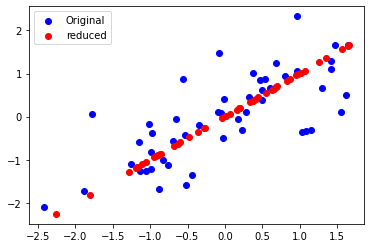

In [19]:
plt.scatter(new_X[:,0],new_X[:,1],color="blue",label="Original")
plt.scatter(X_mod[:,0],X_mod[:,1],color="red",label="reduced")
plt.legend(loc="best")
plt.show()

In [20]:
data=loadmat("/content/drive/MyDrive/Colab Notebooks/datase/pca/ex7faces.mat")
X=data["X"]
print(X.shape)

(5000, 1024)


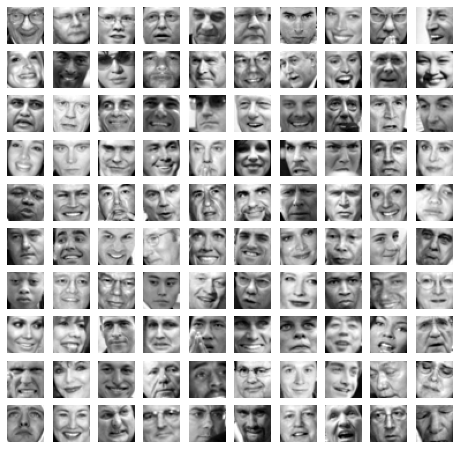

In [23]:
fig,ax=plt.subplots(nrows=10,ncols=10,figsize=(8,8))

for i in range(0,100,10):
  for j in range(10):
    ax[int(i/10),j].imshow(X[i+j,:].reshape(32,32,order="F"),cmap="gray")
    ax[int(i/10),j].axis("off")

In [24]:
new_X=feature_standardize(X)
U=calc_pca(new_X)
X_dash=pca(new_X,U,100)
X_mod=reverse_pca(X_dash,U,100)

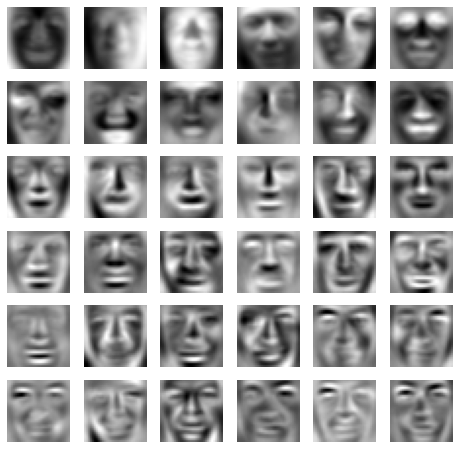

In [25]:
U_reduced = U[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

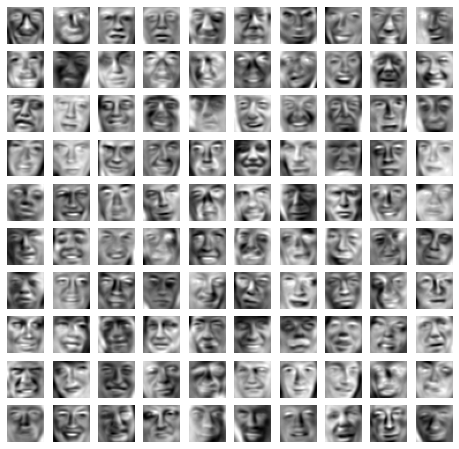

In [26]:
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_mod[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")

In [27]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [38]:
genes=["gene"+str(i) for i in range(1,101)]

wt=["Wt"+str(i) for i in range(1,6)]
ko=["Ko"+str(i) for i in range(1,6)]

df=pd.DataFrame(columns=[*wt,*ko],index=genes)

for gene in df.index:
  df.loc[gene,"Wt1":"Wt5"]=np.random.poisson(lam=rd.randrange(10,1000),size=5)
  df.loc[gene,"Ko1":"Ko5"]=np.random.poisson(lam=rd.randrange(10,1000),size=5)

print(df.head(5))

       Wt1  Wt2  Wt3  Wt4  Wt5  Ko1  Ko2  Ko3  Ko4  Ko5
gene1  346  378  339  364  328  580  549  528  504  498
gene2  896  871  917  894  923  788  791  783  721  808
gene3  892  918  947  882  867   60   89   69   74   64
gene4  189  198  197  198  203  235  264  216  241  235
gene5   67   62   59   79   68   79   81   78   78   76


In [39]:
scaled_data=preprocessing.scale(df.T)
pca=PCA()
pca_data=pca.fit_transform(scaled_data)

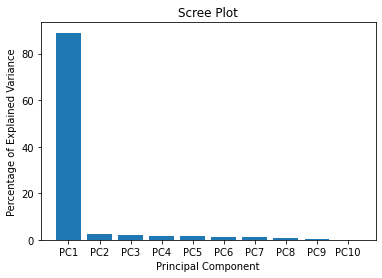

In [40]:
per_var=np.round(pca.explained_variance_ratio_ *100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [41]:
pca_data

array([[ 9.63265713e+00, -1.45061713e+00,  2.40023171e+00,
        -4.92930190e-01, -8.08282766e-02,  5.63904204e-01,
         1.39662256e+00,  5.93506799e-01, -6.55080445e-01,
         7.14629475e-16],
       [ 9.17076804e+00, -2.17307795e+00, -9.12318549e-01,
         1.15681683e-01, -4.52064260e-01, -4.31195169e-01,
        -5.04505718e-02,  7.55388911e-01,  1.30453269e+00,
         7.14629475e-16],
       [ 9.66467243e+00,  8.53632789e-02, -7.79271386e-01,
        -1.18303184e+00, -1.68610517e+00, -1.43458437e+00,
        -9.81906743e-01, -6.87123138e-01, -7.20933341e-01,
         7.14629475e-16],
       [ 9.02744603e+00,  1.88123090e+00, -1.26526021e+00,
         2.13196996e+00, -7.38365714e-01,  1.36236944e+00,
         7.50176101e-01, -6.55754013e-01, -1.34799505e-02,
         7.14629475e-16],
       [ 9.67343087e+00,  1.67240847e+00,  5.07164956e-01,
        -4.41499106e-01,  2.91930419e+00, -6.05874357e-02,
        -1.09194984e+00,  1.47867313e-02,  1.09928590e-01,
         7.

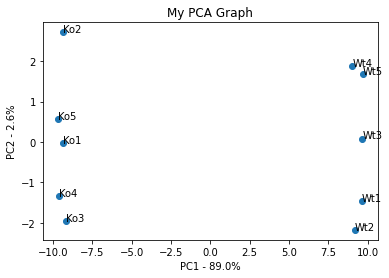

In [43]:
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [44]:
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene95    0.105913
gene74   -0.105903
gene98   -0.105879
gene84   -0.105864
gene44   -0.105862
gene50    0.105859
gene91   -0.105854
gene33    0.105851
gene35   -0.105850
gene17    0.105833
dtype: float64


In [45]:
data=pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [47]:
data.shape

(19999, 785)

In [48]:
data.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
y=data.loc[:,"6"]
X=data.drop("6",axis=1)
print(X.shape,y.shape)

(19999, 784) (19999,)


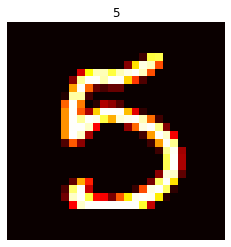

In [52]:
plt.imshow(X.iloc[3].to_numpy().reshape(28,28),interpolation="nearest",cmap="hot")
plt.title(y.iloc[3])
plt.axis("off")
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
scaled_data=StandardScaler().fit_transform(X)
print(scaled_data.shape)

(19999, 784)


In [54]:
sample=scaled_data.copy()
cov_matrix=np.matmul(sample.T,sample)
print(cov_matrix.shape)


(784, 784)


In [56]:
from scipy.linalg import eigh
values,vectors=eigh(cov_matrix,eigvals=(782,783))
print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [57]:
new_cord=np.matmul(vectors,sample.T)

In [58]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_cord, y)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0       1.138147       2.003807    5.0
1      -1.708718       3.722222    7.0
2       9.446533       2.713279    9.0
3       4.499235       3.885012    5.0
4      -6.639764       4.080923    2.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


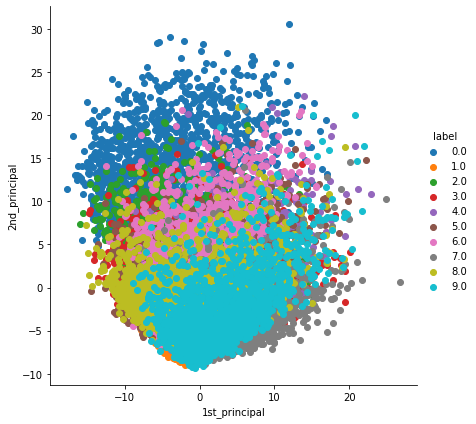

In [59]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

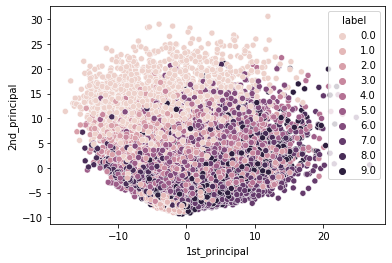

In [61]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

In [62]:
from sklearn.decomposition import PCA
pca=PCA()
pca.n_components=2
pca_data=pca.fit_transform(sample)


In [64]:
print(pca_data.shape)

(19999, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


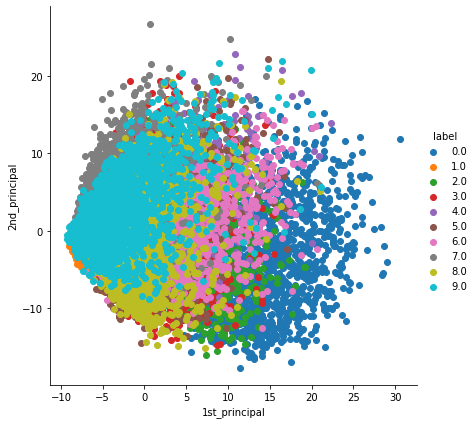

In [65]:
pca_data=np.vstack((pca_data.T,y)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

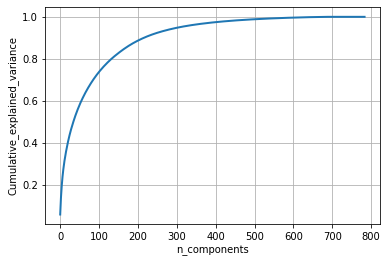

In [67]:
pca.n_components = 784
pca_data = pca.fit_transform(sample)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
